In [189]:
words = open("words.txt", "r").read().splitlines()

In [190]:
from collections import defaultdict

In [191]:
bigrams = defaultdict(int)
for word in words:
    x = ["<S>"] + list(word) + ["<E>"]
    for fst, snd in zip(x, x[1:]):
        bigram = (fst, snd)
        bigrams[bigram] += 1

In [192]:
bigrams[("m","m")]

68

In [193]:
sorted(bigrams, key= lambda k: -bigrams[k])
arr = sorted(bigrams.items(), key = lambda bg: -bg[1])

In [194]:
import torch
count_tensor = torch.zeros((27,27), dtype=torch.int32)

In [195]:
letters = ['.'] + sorted(list(set(''.join(words)))) 
stoi = { s:i for i,s in enumerate(letters)}

In [196]:
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [197]:
for word in words:
    x = ["."] + list(word) + ["."]
    for fst, snd in zip(x, x[1:]):
        a = stoi[fst]
        b = stoi[snd]
        count_tensor[a, b] += 1

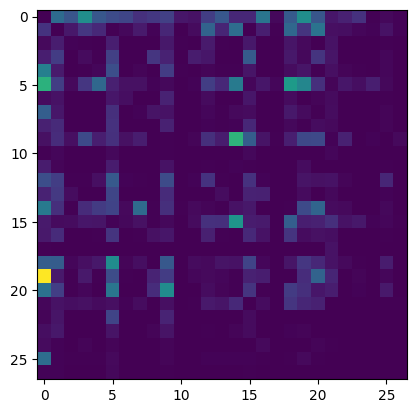

In [198]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(count_tensor)

In [199]:
itos = { i:s for i,s in enumerate(letters)}

In [200]:
count_tensor[0, :] # == count_tensor[0]
p = count_tensor[0].float()
p /= p.sum()
p

tensor([0.0000, 0.0719, 0.0536, 0.1015, 0.0558, 0.0465, 0.0431, 0.0286, 0.0332,
        0.0386, 0.0127, 0.0098, 0.0374, 0.0557, 0.0230, 0.0227, 0.0792, 0.0046,
        0.0582, 0.1007, 0.0549, 0.0127, 0.0191, 0.0289, 0.0012, 0.0042, 0.0022])

In [201]:
g = torch.Generator().manual_seed(2**31 +1)
pt = torch.rand(3, generator=g)
pt /= p.sum()
pt

tensor([0.3312, 0.9637, 0.3629])

In [202]:
g = torch.Generator().manual_seed(2**31 +1)
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([16, 20, 22, 22,  2,  3,  5,  4,  6, 14, 16, 12, 20,  7, 18, 23,  5,  3,
        19, 12])

In [220]:
g = torch.Generator().manual_seed(2**31 -1)
ix = 0

out = []
for i in range(30):
    word = []
    while True:
        p = count_tensor[ix].float()
        p /= p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        word.append(itos[ix])
        if ix == 0:
            break
    out.append("".join(word))

print()
for i in range(3):
    while True:
        p = torch.ones(27).float()
        p /= p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True).item()
        print(itos[ix],end="")
        if ix == 0:
            break
    print()

out


pgxxwhfosvqbmigtml.
dgdqv.
dscprlzodquerrsfdg.


['munided.',
 'ppagat.',
 'p.',
 'ctay.',
 'ecin.',
 'fuitritoleras.',
 'tet.',
 'bs.',
 'antauranileveackibininrwimer.',
 's.',
 'juinay.',
 'arterinveumestfontume.',
 'ponts.',
 'walestequcore.',
 'y.',
 'engrerapated.',
 'wedimouim.',
 'ynin.',
 'ag.',
 'asntss.',
 'imousushtdgos.',
 'mptingict.',
 'r.',
 'pinfothotir.',
 'somed.',
 'ine.',
 'fy.',
 'p.',
 'mmeaumemaludewitepphectrarr.',
 'wenhuangrta.']

In [209]:
out

['kiomoiclepan.',
 'teacutada.',
 'de.',
 'ming.',
 'pontymamanthti.',
 'cendiamarthtst.',
 'nusltiod.',
 'retsod.',
 't.',
 'shi.',
 'bl.',
 'aveseerstemor.',
 'fation.',
 'gs.',
 'con.',
 'c.',
 'pan.',
 'comumarmalem.',
 'cl.',
 'moncered.',
 'b.',
 'cen.',
 's.',
 'pl.',
 'vim.',
 'coramapplye.',
 'sse.',
 'erery.',
 'hy.',
 'rs.']

In [221]:
P = count_tensor.float()
P /= P.sum(1, keepdim=True)

In [222]:
g = torch.Generator().manual_seed(2**31 -1)
ix = 0

out = []
for i in range(30):
    word = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        word.append(itos[ix])
        if ix == 0:
            break
    out.append("".join(word))
out

['munided.',
 'ppagat.',
 'p.',
 'ctay.',
 'ecin.',
 'fuitritoleras.',
 'tet.',
 'bs.',
 'antauranileveackibininrwimer.',
 's.',
 'juinay.',
 'arterinveumestfontume.',
 'ponts.',
 'walestequcore.',
 'y.',
 'engrerapated.',
 'wedimouim.',
 'ynin.',
 'ag.',
 'asntss.',
 'imousushtdgos.',
 'mptingict.',
 'r.',
 'pinfothotir.',
 'somed.',
 'ine.',
 'fy.',
 'p.',
 'mmeaumemaludewitepphectrarr.',
 'wenhuangrta.']